In [1]:
import pydicom

import matplotlib.pyplot as plt
import SimpleITK as sitk
import pydicom
import numpy as np
import os
from glob import glob

from pydicom.dataset import FileMetaDataset

from pydicom.uid import UID

(648, 80, 80)
float32 0.0 21.201868


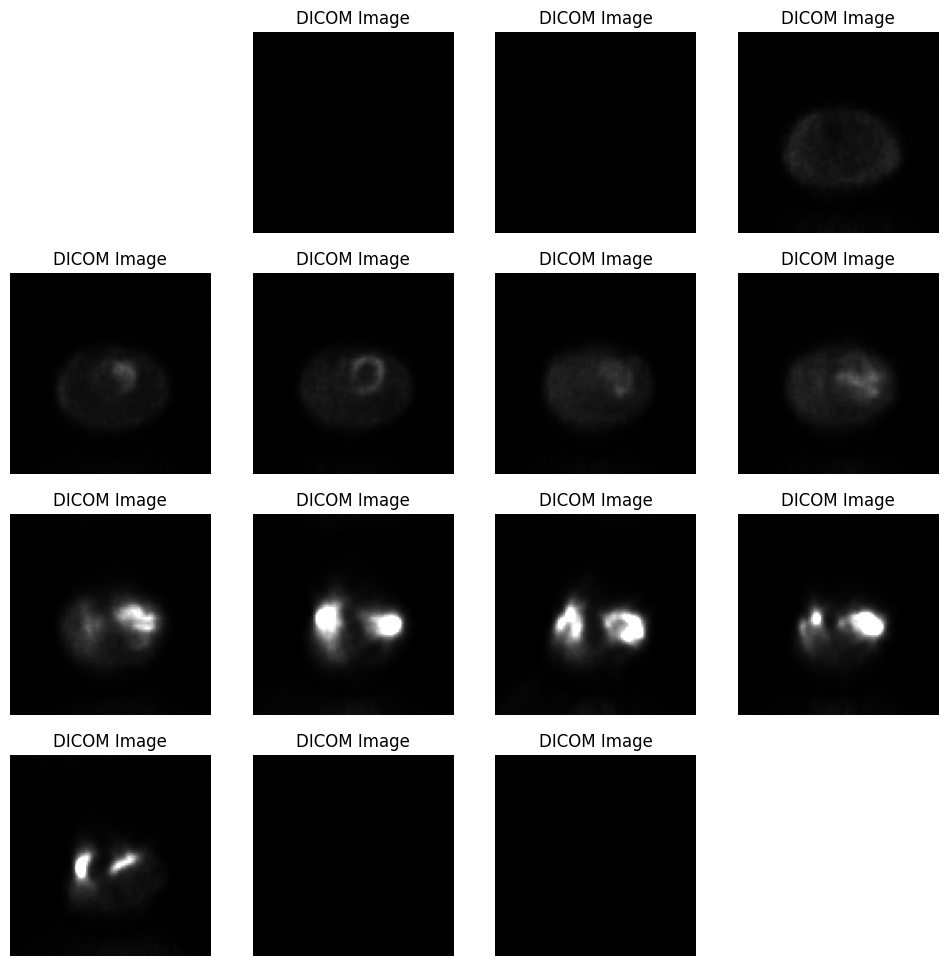

In [43]:
# 读取 DICOM 文件
dicom_path = "heart-dicom-rest-gate.dcm"
ds = pydicom.dcmread(dicom_path)


# 提取像素数据
image = ds.pixel_array
print(image.shape)



plt.figure(figsize=(12, 12))

for p_id, s_id in enumerate(range(0, 80, 6), start=1):
    plt.subplot(4,4,p_id+1)
    # 显示图像
    plt.imshow(image[s_id,:,:], cmap="gray", vmax=5)  # DICOM 通常是灰度图
    plt.title("DICOM Image")
    plt.axis("off")
    # plt.show()
print(image.dtype, image.min(), image.max())


float32 0.0 70.83131


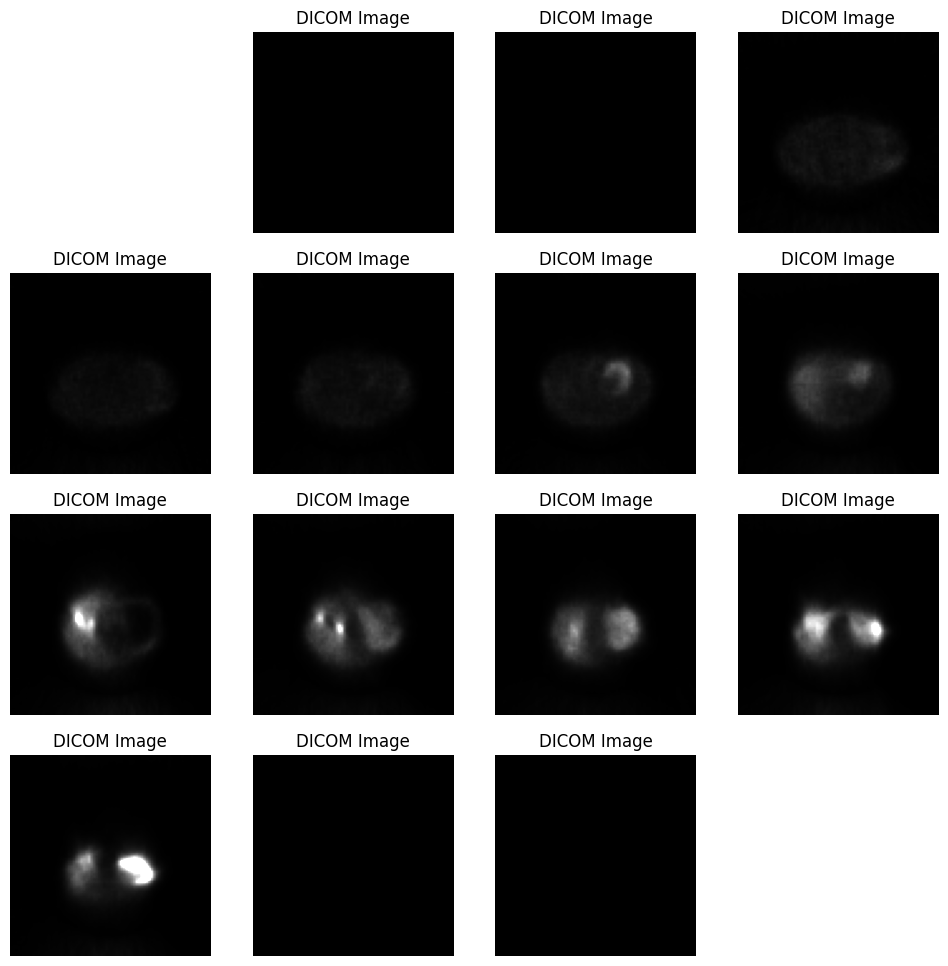

In [46]:
# 读取 DICOM 文件

base_dir = "/mnt/labnas/DataCollection/Project/RadiSmart/cardiac/gate_recon"
nii_path_list = glob(os.path.join(base_dir, f"{0}_*_i5.nii.gz"))
nii_path_list = sorted(nii_path_list)
    
image = np.zeros((648, 80, 80), dtype=np.float32)
for i, nii_path in enumerate(nii_path_list):
    # 读取 NIfTI 文件
    im = sitk.ReadImage(nii_path)
    image[i*81: (i+1)*81] = sitk.GetArrayFromImage(im)  # (Z, Y, X)



plt.figure(figsize=(12, 12))

for p_id, s_id in enumerate(range(0, 80, 6), start=1):
    plt.subplot(4,4,p_id+1)
    # 显示图像
    plt.imshow(image[s_id,:,:], cmap="gray", vmax=5)  # DICOM 通常是灰度图
    plt.title("DICOM Image")
    plt.axis("off")
    # plt.show()
print(image.dtype, image.min(), image.max())
